In [1]:
%matplotlib inline
import numpy as np
import matplotlib.tri as Tri
from netCDF4 import Dataset as NetCDFFile 
import netCDF4
from netCDF4 import num2date, date2num, date2index
import datetime as dt
import pandas as pd
from StringIO import StringIO
import xarray as xr
from scipy import stats
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import seaborn as sns
from datetime import datetime


/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


## Install File


In [2]:
nameCSV = 'hydro_1.csv'
df = pd.read_csv(str(nameCSV), sep=r'\s+', engine='c', header=0, na_filter=False, \
                               dtype=np.float, low_memory=False)

data = df.sort_values(by=['tt'])

lat = data.values[:,0]
lon = data.values[:,1]
wh = data.values[:,2]
tt = data.values[:,3]
qc = data.values[:,4]
back =data.values[:,5]
ws = data.values[:,6]
len(lat)

2034

## Calculate mean value of each satellite track - technically shouldn't have to do this since it should be in the make file??

In [3]:
days = [] #daystart
for k in range(len(tt)):
       
    t1 = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
    if k == 0: #get day 0. Then else: every day after that
        days.append(0)
        dd = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
        it = 0
    else:
        if t1.day != dd.day: #if day 1 is not equal to day 2, then append
            #print dd.day,t1.day
            days.append(k)
            it += 1
            dd = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
            
            
print 'Number of Satellite Tracks:', len(tt[days])

Number of Satellite Tracks: 1856


## Make ndarray(alltime) and list(days2) that has dates

In [4]:
alltime = num2date(tt[:],u'days since 1985-01-01 00:00:00 UTC')

In [5]:
for k in range(len(days)):
    print wh[days[k]], alltime[k]

2.2381179332733154 1985-04-09 08:40:00.762408
2.335000276565552 1985-05-02 10:19:42.794643
1.6103999614715576 1985-05-05 10:28:31.310936
2.806500196456909 1985-05-28 12:08:08.132813
1.6183530092239382 1985-06-26 03:00:05.350414
0.43242108821868896 1985-08-08 17:15:39.942435
1.225307822227478 1985-09-23 20:34:46.584136
1.1935999393463137 1985-11-12 00:02:04.968699
0.4020000398159027 1985-11-14 13:05:19.043750
0.2772000133991241 1985-12-10 14:53:17.146876
1.3723334074020386 1986-01-20 04:59:25.847330
1.9206666946411133 1986-01-23 05:08:08.691408
0.5419999957084656 1986-02-12 06:38:26.406249
0.54666668176651 1986-02-15 06:47:09.250327
2.8298890590667725 1986-04-02 10:05:05.468750
1.30566668510437 1986-05-18 13:22:42.188367
1.4013333320617676 1986-06-10 15:01:19.719617
0.8573750257492065 1986-07-03 16:39:51.374022
1.4612727165222168 1986-09-10 21:35:17.028408
0.4185000061988831 1986-09-16 10:47:24.924219
0.467600017786026 1986-11-13 02:02:23.975000
1.2897223234176636 1986-11-30 03:15:04.79

1.162999987602234 2004-01-01 23:20:32.980469
1.887500047683716 2004-01-07 12:08:07.810825
2.0458002090454097 2004-01-09 03:36:06.923828
1.4448182582855225 2004-01-11 16:38:16.580728
1.0756000280380251 2004-01-11 21:19:04.109374
1.4657500982284546 2004-01-21 19:17:36.289062
1.1178889274597168 2004-01-25 23:46:47.854165
0.9243077039718628 2004-01-26 04:49:02.152645
2.872267007827759 2004-01-26 12:10:57.195313
1.6765000820159912 2004-01-28 17:51:09.678977
0.5622666478157043 2004-01-31 17:16:07.695313
0.943666696548462 2004-02-10 15:14:39.734375
2.244133472442627 2004-02-11 12:08:05.251302
1.8912001848220823 2004-02-12 06:01:54.780791
1.1232500076293943 2004-02-14 19:03:59.559570
1.0555883646011353 2004-02-20 13:13:10.632814
0.8208461999893188 2004-02-29 23:46:47.940430
0.675000011920929 2004-03-01 11:11:44.035156
1.4818667173385618 2004-03-01 12:10:57.016226
2.8892502784729004 2004-03-11 09:10:15.804686
2.1706666946411133 2004-03-17 12:08:07.799317
1.310785889625549 2004-03-21 07:08:47.71

1.2397500038146974 2010-06-17 10:57:22.905078
1.2698125839233398 2010-06-27 08:55:54.158203
2.1729410956887643 2010-06-27 23:46:29.735491
1.8253636360168457 2010-06-28 12:10:39.412499
1.6612501144409182 2010-07-07 06:54:24.867188
2.9194002151489262 2010-07-14 12:07:48.435936
2.4969286918640137 2010-07-17 04:52:56.340625
2.599944432576497 2010-07-31 22:56:35.603122
1.5410001754760745 2010-08-01 23:46:31.622070
0.6870555877685547 2010-08-02 12:10:41.298439
1.1172727346420288 2010-08-02 14:15:14.151442
1.4224000930786134 2010-08-08 01:53:48.822537
1.4327144622802734 2010-08-15 22:48:31.546132
2.8738335503472223 2010-08-18 12:07:49.881251
1.27189998626709 2010-08-25 20:47:03.266406
0.8798824198105756 2010-09-04 18:45:35.009673
1.950416684150696 2010-09-05 23:46:31.205078
0.8452499389648438 2010-09-06 12:10:40.881248
1.46399986743927 2010-09-14 16:44:06.825000
0.8860000722548541 2010-09-22 12:07:46.785157
0.6721111403571235 2010-09-24 14:42:38.203906
0.7575294270234949 2010-09-29 11:25:20.4

0.8264500617980957 2016-08-25 05:21:21.661831
1.0201905568440754 2016-08-25 05:22:44.573660
0.9662500619888306 2016-08-25 12:21:43.198784
1.1193999290466308 2016-09-04 03:19:53.585156
0.6245882511138916 2016-09-04 03:21:15.424218
0.8390000462532043 2016-09-14 01:18:25.623730
2.2322777642144103 2016-09-14 01:19:46.460498
1.6684707403182983 2016-09-15 23:45:27
1.4031429290771484 2016-09-17 23:18:07.151909
0.7223999977111817 2016-09-20 12:08:45
2.5340001583099365 2016-09-23 10:56:39.444444
1.2415240151541571 2016-09-23 23:16:57.543898
2.930750274658203 2016-09-24 10:38:13.956846
2.3502777947319884 2016-10-03 21:16:51.165625
0.5408888922797309 2016-10-12 23:45:28
0.9192857288178944 2016-10-16 21:53:02.459559
0.9635000228881836 2016-10-17 12:08:45
0.4221764802932739 2016-10-18 08:35:46.117820
0.8244999885559082 2016-10-20 04:45:22.135742
0.7878000259399414 2016-10-20 09:34:04.861328
0.6769048145839146 2016-10-23 12:37:47.155838
2.84431266784668 2016-10-23 17:14:03.046879
2.121500015258789 2

In [6]:
days2 = [] #daystart
for k in range(len(alltime)):
       
    t1 = alltime[k]
    if k == 0: #get day 0. Then else: every day after that
        days2.append(alltime[k])
        dd =alltime[k]
        it = 0
    else:
        if t1.day != dd.day: #if day 1 is not equal to day 2, then append
            #print dd.day,t1.day
            days2.append(alltime[k])
            it += 1
            dd = alltime[k]
            
            
print 'Number of Satellite Tracks:', len(tt[days])

Number of Satellite Tracks: 1856


In [7]:
days2

[datetime.datetime(1985, 4, 9, 8, 40, 0, 762408),
 datetime.datetime(1985, 5, 2, 10, 19, 42, 794643),
 datetime.datetime(1985, 5, 5, 10, 28, 31, 310936),
 datetime.datetime(1985, 5, 28, 12, 8, 8, 132813),
 datetime.datetime(1985, 6, 26, 3, 0, 5, 350414),
 datetime.datetime(1985, 8, 8, 17, 15, 39, 942435),
 datetime.datetime(1985, 9, 23, 20, 34, 46, 584136),
 datetime.datetime(1985, 11, 12, 0, 2, 4, 968699),
 datetime.datetime(1985, 11, 14, 13, 5, 19, 43750),
 datetime.datetime(1985, 12, 10, 14, 53, 17, 146876),
 datetime.datetime(1986, 1, 20, 4, 59, 25, 847330),
 datetime.datetime(1986, 1, 23, 5, 8, 8, 691408),
 datetime.datetime(1986, 2, 12, 6, 38, 26, 406249),
 datetime.datetime(1986, 2, 15, 6, 47, 9, 250327),
 datetime.datetime(1986, 4, 2, 10, 5, 5, 468750),
 datetime.datetime(1986, 5, 18, 13, 22, 42, 188367),
 datetime.datetime(1986, 6, 10, 15, 1, 19, 719617),
 datetime.datetime(1986, 7, 3, 16, 39, 51, 374022),
 datetime.datetime(1986, 9, 10, 21, 35, 17, 28408),
 datetime.datetime(

## WAVE PERIOD EQN

$ \epsilon = 3.25 \left( H_s^2 g^2/U^4 \right)^{0.31}$


In [8]:
def waveage(H, U, grav=9.80665):
    '''
    The pseudo wave age can be expressed in terms of significant wave height and surface wind speed.
    '''

    grav2 = grav**2
    hs2 = np.square(H) 
    u4 = np.power(U,4)
    tmp = np.divide(hs2*grav2,u4)
    eps = 3.25*np.power(tmp,0.31)
    
    return eps


def waveperiod(H, U, grav=9.80665):
    '''
    Wave age from GA-2, Govindan et al.
    '''

    eps = waveage(H, U, grav=9.80665)
    period = (((eps-(5.78))/(eps+(U/(H*((U/H)+H)))))+(H+(5.70)))
    
    return period

In [9]:
T = waveperiod(wh,ws)
print T
print len(T),len(wh)

[5.84620415 5.63695702 6.05039616 ... 5.12231117 6.9817432  7.86692226]
2034 2034


In [10]:
dayswh = wh[days] #wave height for each satellite pass
daysTz = T[days]

print len(dayswh)
print len(daysTz)

1856
1856


In [11]:
dayswh

array([2.23811793, 2.33500028, 1.61039996, ..., 1.51025009, 1.31061109,
       1.69944456])

## Calculate Wave Power



### Total Wave Energy
$E = \frac{1}{8} \left(pgH_s^2\right) $


In [12]:
def totalwaveenergy(H):
    
    '''
    The total wave energy can be calculated using Hs, gravity and water density
    '''
    
    x = 1./8.
    p = 1025. #sea water density, kg/m^3
    g = 9.80665
    h2 = np.square(H) 
    
    pgh = p*g*h2
    
    e = x*pgh
    
    return e

In [13]:
we = totalwaveenergy(wh)

In [14]:
we

array([6293.90941687, 6850.59710452, 3258.53250024, ..., 2865.8423451 ,
       2158.25238931, 3628.84615134])

### Wave energy speed / Wave Velocity
$Cg = \frac{gTz}{2\pi}n$


In [15]:
import math
def wavespeed(T):
    '''
    Wave group speed
    '''
    
    g =9.80665
    ts = T #wave period
    pi = 2*math.pi
    n=0.5
    
    top = g*ts
    
    Cg = n *(np.divide(top,pi))
    
    return Cg
    

In [16]:
Cg = wavespeed(T)
Cg

array([4.56230997, 4.39901593, 4.72165905, ..., 3.99739228, 5.44847148,
       6.13925497])

### Wave Energy Flux
$P = ECg$

In [17]:
def waveenergyflux(H,T):
    '''
    The rate at which energy is carried by waves, determined using total wave energy and wave energy speed
    '''
    
    e = totalwaveenergy(H)
    Cg = wavespeed(T)
    y = 0.001
    P = e * Cg*y
    
    return P
    
    

In [18]:
power1 = waveenergyflux(wh,T)
power1

array([28.71476568, 30.13588579, 15.38567947, ..., 11.45589606,
       11.7591766 , 22.27841175])

In [19]:
pp = power1[days]

In [20]:
print pp.shape, power1.shape, 'therefore use pp in df'

(1856,) (2034,) therefore use pp in df


In [21]:
print dayswh.shape
print daysTz.shape

(1856,)
(1856,)


In [22]:
df = pd.DataFrame(data={"date": days2, "wh":dayswh, "period":daysTz, "power":pp})
df.to_csv("hydro_timeseries.csv", sep=',',index=False)
df

,date,period,power,wh
0,1985-04-09 08:40:00.762408,5.846204,28.714766,2.238118
1,1985-05-02 10:19:42.794643,5.636957,30.135886,2.335000
2,1985-05-05 10:28:31.310936,6.050396,15.385679,1.610400
3,1985-05-28 12:08:08.132813,6.706180,51.792959,2.806500
4,1985-06-26 03:00:05.350414,5.822617,14.953061,1.618353
5,1985-08-08 17:15:39.942435,3.832805,0.702742,0.432421
6,1985-09-23 20:34:46.584136,5.609896,8.258680,1.225308
7,1985-11-12 00:02:04.968699,5.444104,7.605178,1.193600
8,1985-11-14 13:05:19.043750,4.147817,0.657260,0.402000
9,1985-12-10 14:53:17.146876,3.297859,0.248476,0.277200


In [23]:
print len(df.wh)
print len(df.date)
print len(df.power)

1856
1856
1856


## Get rolling average wh based on 30 Days

In [24]:
yrolling = df.rolling('30D', on = 'date', min_periods = 1).mean()

In [25]:
yrolling

,date,period,power,wh
0,1985-04-09 08:40:00.762408,5.846204,28.714766,2.238118
1,1985-05-02 10:19:42.794643,5.741581,29.425326,2.286559
2,1985-05-05 10:28:31.310936,5.844519,24.745444,2.061173
3,1985-05-28 12:08:08.132813,6.131178,32.438175,2.250633
4,1985-06-26 03:00:05.350414,6.264398,33.373010,2.212427
5,1985-08-08 17:15:39.942435,3.832805,0.702742,0.432421
6,1985-09-23 20:34:46.584136,5.609896,8.258680,1.225308
7,1985-11-12 00:02:04.968699,5.444104,7.605178,1.193600
8,1985-11-14 13:05:19.043750,4.795961,4.131219,0.797800
9,1985-12-10 14:53:17.146876,4.296593,2.836971,0.624267


In [26]:
wh_rolling=yrolling['wh']

period_rolling=yrolling['period']

power_rolling = yrolling['power']

## Incorporate rolling average wh into dataframe

In [27]:
df = pd.DataFrame(data={"date": days2, "wh":dayswh, "wh_rolling":wh_rolling, "period":daysTz, "period_rolling":period_rolling, "power":pp, "power_rolling":power_rolling })
df.to_csv("hydro_timeseries.csv", sep=',',index=False)
df

,date,period,period_rolling,power,power_rolling,wh,wh_rolling
0,1985-04-09 08:40:00.762408,5.846204,5.846204,28.714766,28.714766,2.238118,2.238118
1,1985-05-02 10:19:42.794643,5.636957,5.741581,30.135886,29.425326,2.335000,2.286559
2,1985-05-05 10:28:31.310936,6.050396,5.844519,15.385679,24.745444,1.610400,2.061173
3,1985-05-28 12:08:08.132813,6.706180,6.131178,51.792959,32.438175,2.806500,2.250633
4,1985-06-26 03:00:05.350414,5.822617,6.264398,14.953061,33.373010,1.618353,2.212427
5,1985-08-08 17:15:39.942435,3.832805,3.832805,0.702742,0.702742,0.432421,0.432421
6,1985-09-23 20:34:46.584136,5.609896,5.609896,8.258680,8.258680,1.225308,1.225308
7,1985-11-12 00:02:04.968699,5.444104,5.444104,7.605178,7.605178,1.193600,1.193600
8,1985-11-14 13:05:19.043750,4.147817,4.795961,0.657260,4.131219,0.402000,0.797800
9,1985-12-10 14:53:17.146876,3.297859,4.296593,0.248476,2.836971,0.277200,0.624267


In [28]:
print df.date[57]
print df.date[58]

1988-08-04 22:52:31.958706
1992-10-14 08:57:09.004934


In [29]:
#Period normal    
time1 = df.period[0:57]
time2 = df.period[58:-1]

#Period rolling
tt1 = df.period_rolling[0:57]
tt2 = df.period_rolling[58:-1]
        


#Hs normal
y1 = df.wh[0:57]
y2 = df.wh[58:-1]

#Hs rolling
yy1 = df.wh_rolling[0:57]
yy2 = df.wh_rolling[58:-1]

#power normal
p1 = df.power[0:57]
p2=df.power[58:-1]

#power rolling
pp1 = df.power_rolling[0:57]
pp2 = df.power_rolling[58:-1]


#Date
x1=df.date[0:57]
x2 = df.date[58:-1]

/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


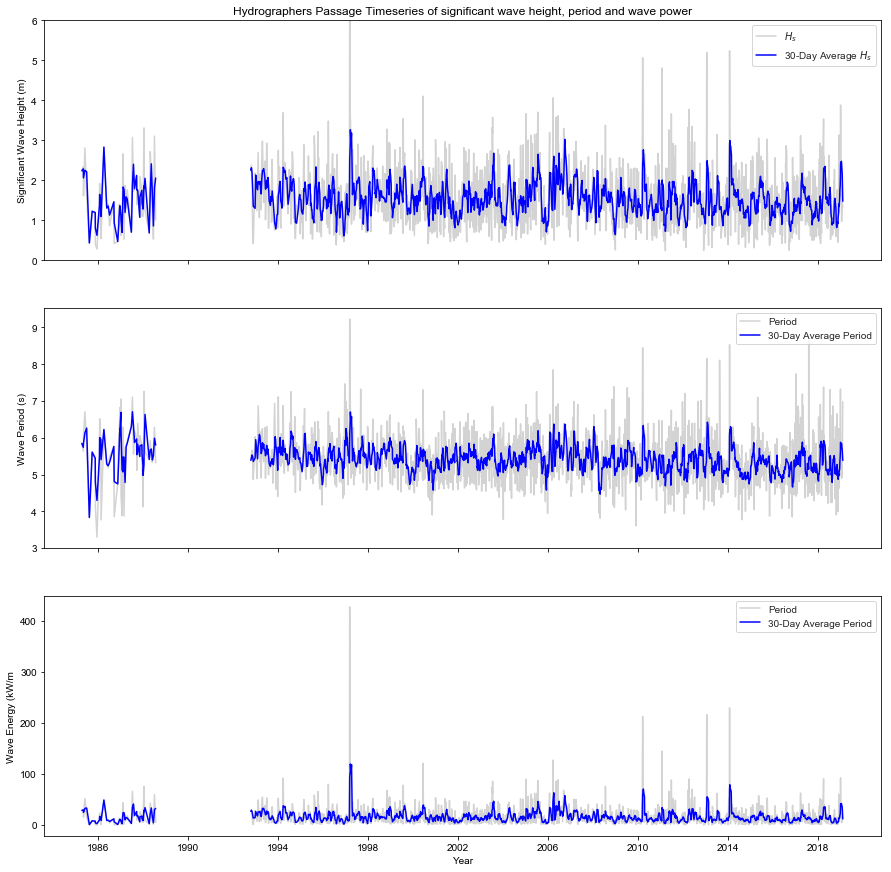

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex = True,figsize = (15,15))    


sns.set_style("white")
#fig.title("Innisfail 30 Day Moving Average Significant Wave Height")


#HS
#Before date break
ax1.plot(x1,y1,color='lightgrey',label="$H_s$")
ax1.plot(x1,yy1,color='blue',label="30-Day Average $H_s$")

#After date break
ax1.plot(x2,y2,color='lightgrey', label='False')
ax1.plot(x2,yy2,color='blue')

ax1.legend(labels=["$H_s$","30-Day Average $H_s$"], loc='upper right')
ax1.set_ylabel("Significant Wave Height (m)")
ax1.set_ylim(0,6)


#Wave Period 
#Before date break
ax2.plot(x1, time1, color='lightgrey')
ax2.plot(x1,tt1,color='blue')

#After date break
ax2.plot(x2,time2, color='lightgrey')
ax2.plot(x2,tt2,color='blue')

ax2.legend(labels=['Period',"30-Day Average Period"], loc='upper right')
ax2.set_ylabel("Wave Period (s)")


#Wave Power - Need to add data
#Before date break
ax3.plot(x1, p1,color='lightgrey')
ax3.plot(x1,pp1,color='blue')

#After date break
ax3.plot(x2,p2,color='lightgrey')
ax3.plot(x2,pp2,color='blue')
ax3.legend(labels=['Period',"30-Day Average Period"], loc='upper right')
ax3.set_ylabel("Wave Energy (kW/m") #Check if watts/metre is correct

ax1.set_title('Hydrographers Passage Timeseries of significant wave height, period and wave power')
#Formatting

plt.xlabel("Year")

#"years = pd.date_range(start='1985',end='2020', periods=10)
years = pd.date_range('2008','2015', freq='AS')

plt.savefig("Hydrographers_timeseries")

In [31]:
max(wh)

6.8699378967285165

In [32]:
for k in range(len(days)):
    if wh[k]>6:
        print wh[k], alltime[k]

6.8699378967285165 1997-03-08 16:58:09.695312


## Make month-year df

In [33]:
r = netCDF4.num2date(tt[days],u'days since 1985-01-01 00:00:00 UTC')


In [34]:
# use this to make year/month df

def getMeanH(month,year):
    valwh = []
    for k in range(len(days)):
        if r[k].year == year and r[k].month == month:
            valwh.append(wh[days[k]])

    return np.mean(valwh)


monthYear = []
for k in range(1,13):
    monthYear.append(getMeanH(k,2018))

print monthYear,
#     print alltime[k].year #,wh[days[k]]



[1.3129720434877608, 1.2741128996724174, 1.7020088087944758, 2.3466952047316854, 1.5864599614949868, 1.342696315523178, 1.3333649778789054, 0.9374504864166014, 1.558715076749287, 0.7987738703924513, 1.132318799761544, 1.8573764006650952]


## Seasonal Kendall Test

In [35]:
nameCSV = 'hydrowh_my_no_nan_long.csv'
no_nan = pd.read_csv(str(nameCSV))
no_nan.set_index('Date')

,Wh
Date,
19931,1.762222
19932,2.699450
19933,1.658841
19934,2.573696
19935,2.032772
19936,1.840281
19937,1.525691
19938,1.559440
19939,1.722712


In [36]:
import pymannkendall as mk
seasonal = mk.seasonal_test(no_nan, period=12)
seasonal

Seasonal_Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=10.005286243454291, Tau=0.26852996949459973, s=26056.0, var_s=6781458.666666667, slope=0.005892414339703)

In [37]:
max(df.power)

427.07862884622466

In [40]:
np.mean(df.power)

15.881981186391908